# Imports 

In [40]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad

plt.rcParams['figure.figsize'] = (7, 7)
from scipy.stats import median_abs_deviation

In [8]:
import sys  
sys.path.insert(0, '/home/p/pohll/Desktop/Masterpraktikum/masterpraktikum_fibrosis_atlas/source')
#sys.path.append("Desktop/Masterpraktikum/masterpraktikum_fibrosis_atlas/source/utils.py")
import utils

In [79]:
adata = sc.read("/home/p/pohll/Downloads/aged_bleomycin(1).h5ad")

# Qualitly Control 

In [80]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith(("MT-", "mt-"))
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL", "rps", "rpl"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [81]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)

In [16]:
adata.obs["orig.ident"].cat.categories

Index(['1_Sal_veh_d21', '2_Sal_veh_d21', '3_Sal_veh_d21', '4_Sal_veh_d21',
       '5_Sal_veh_d21', '6_Sal_veh_d21', '7_Sal_veh_d21', '8_Sal_veh_d21',
       '9_Sal_veh_d21', '11_Sal_veh_d21', '16_BLM_veh_d21', '17_BLM_veh_d21',
       '18_BLM_veh_d21', '20_BLM_veh_d21', '21_BLM_veh_d21', '25_BLM_veh_d21',
       '26_BLM_veh_d21', '27_BLM_veh_d21', '29_BLM_veh_d21', '33_BLM_veh_d21',
       '34_BLM_veh_d21', '35_BLM_veh_d21', '36_BLM_veh_d21', '40_BLM_veh_d21',
       '41_Sal_veh_d42', '42_Sal_veh_d42', '43_Sal_veh_d42', '44_Sal_veh_d42',
       '45_Sal_veh_d42', '46_Sal_veh_d42', '47_Sal_veh_d42', '48_Sal_veh_d42',
       '49_Sal_veh_d42', '50_Sal_veh_d42', '59_BLM_veh_d42', '60_BLM_veh_d42',
       '63_BLM_veh_d42', '66_BLM_veh_d42', '68_BLM_veh_d42', '73_BLM_veh_d42',
       '75_BLM_veh_d42', '76_BLM_veh_d42', '78_BLM_veh_d42'],
      dtype='object')

In [17]:
adata.obs["SAMP_exp_group"].cat.categories

Index(['BLM_day21', 'BLM_day42', 'SHAM_day21', 'SHAM_day42'], dtype='object')

In [23]:
adata.obs["SAMP_condition"]

1_Sal_veh_d21_AAACCCAAGACATATG-1    SHAM
1_Sal_veh_d21_AAACCCAGTATTCTCT-1    SHAM
1_Sal_veh_d21_AAACCCATCCGCTGTT-1    SHAM
1_Sal_veh_d21_AAACGCTAGCGGGTTA-1    SHAM
1_Sal_veh_d21_AAAGGATGTAGATCCT-1    SHAM
                                    ... 
9_Sal_veh_d21_TTTGGTTTCGTTACCC-1    SHAM
9_Sal_veh_d21_TTTGTTGAGTCAGAGC-1    SHAM
9_Sal_veh_d21_TTTGTTGGTCATACCA-1    SHAM
9_Sal_veh_d21_TTTGTTGTCTCCTACG-1    SHAM
9_Sal_veh_d21_TTTGTTGTCTGGAGAG-1    SHAM
Name: SAMP_condition, Length: 110761, dtype: category
Categories (2, object): ['BLM', 'SHAM']

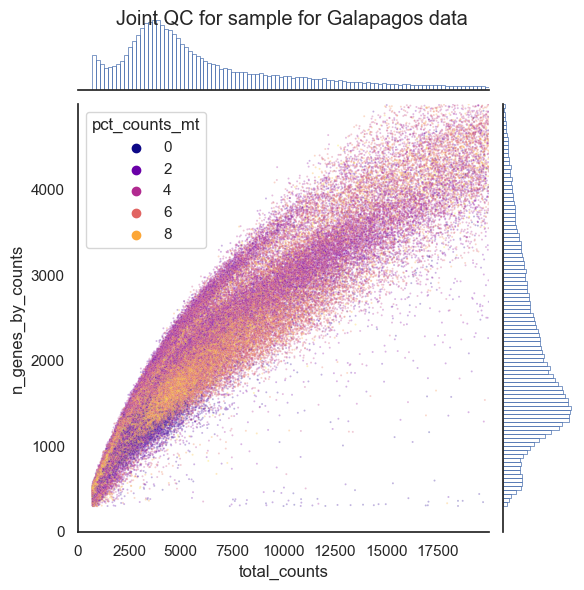

In [82]:
utils.plot_qc_joint(adata, x="total_counts",
                    y='n_genes_by_counts', 
                    hue='pct_counts_mt', 
                    palette='plasma',
                    # marginal_hue="sample",
                    #x_threshold=(300, 4000), # total_counts
                    #y_threshold=(0, 17000), # n_genes_by_counts
                    title='Joint QC for sample for Galapagos data')

In [ ]:
# todo violin plot 

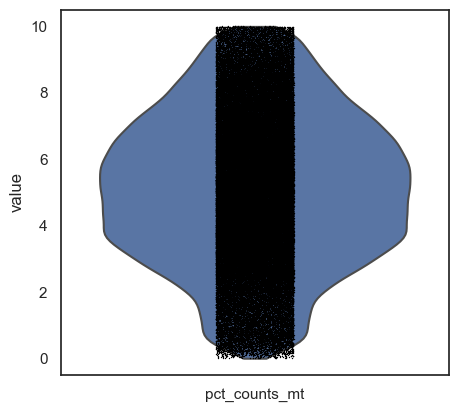

In [83]:
plt.rcParams['figure.figsize'] = (5, 5)
p2 = sc.pl.violin(adata, "pct_counts_mt",title="proportion of total counts for a cell which are mitochondrial")


# Normalize

In [84]:
adata.layers["raw_counts"]= adata.X

<AxesSubplot: xlabel='total_counts', ylabel='Count'>

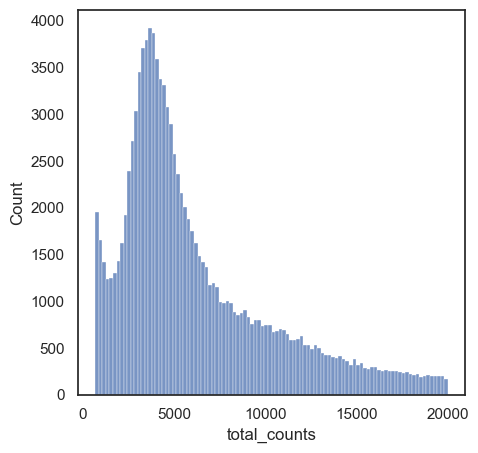

In [85]:

sns.histplot(adata.obs["total_counts"], bins=100, kde=False)


[(0.0, 5000.0), (0.0, 4000.0)]

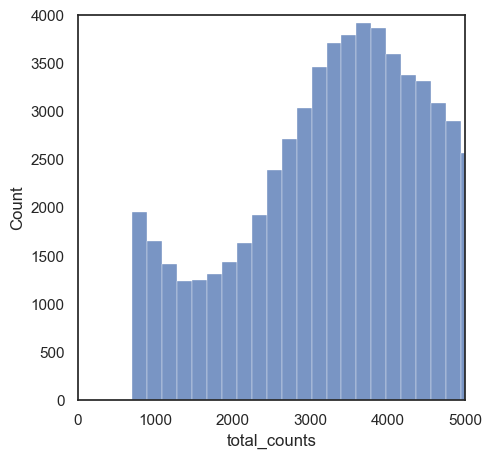

In [86]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.histplot(
    adata.obs, x="total_counts", bins=100, kde=False, legend = True
).set(xlim=(0,5000), ylim=(0,4000))

[(0.0, 1600.0), (0.0, 4000.0)]

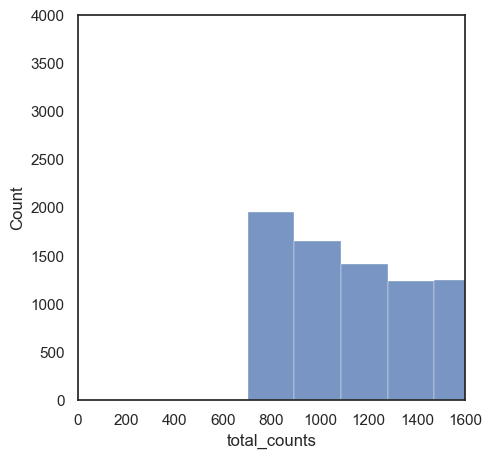

In [87]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.histplot(
    adata.obs, x="total_counts", bins=100, kde=False, legend = True
).set(xlim=(0,1600), ylim=(0,4000))

-->  filter first 1400 cells

In [90]:
sc.pp.filter_cells(adata, min_counts=1400)

In [93]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
adata.layers["logcounts"]= sc.pp.log1p(scales_counts["X"], copy=True)

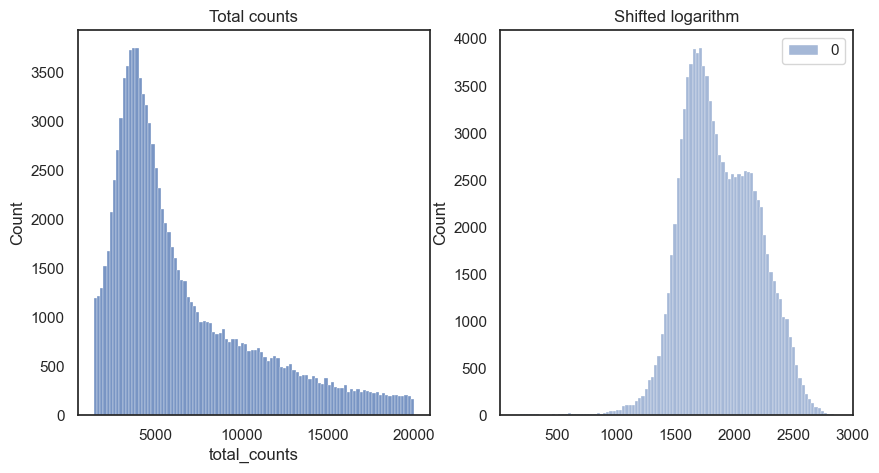

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.layers["logcounts"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

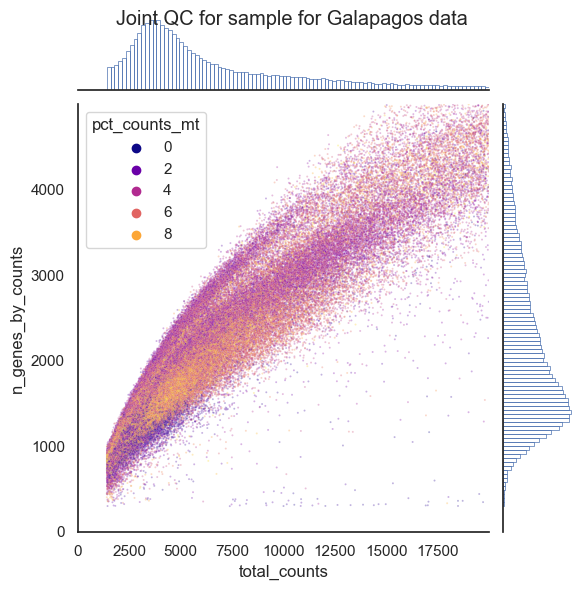

In [100]:
utils.plot_qc_joint(adata, x="total_counts",
                    y='n_genes_by_counts', 
                    hue='pct_counts_mt', 
                    palette='plasma',
                    # marginal_hue="sample",
                    #x_threshold=(300, 4000), # total_counts
                    #y_threshold=(0, 17000), # n_genes_by_counts
                    title='Joint QC for sample for Galapagos data')

# Feature selection 

In [95]:
sc.pp.highly_variable_genes(adata, layer="logcounts", min_mean=0.0120, max_mean=3, min_disp=0.5)

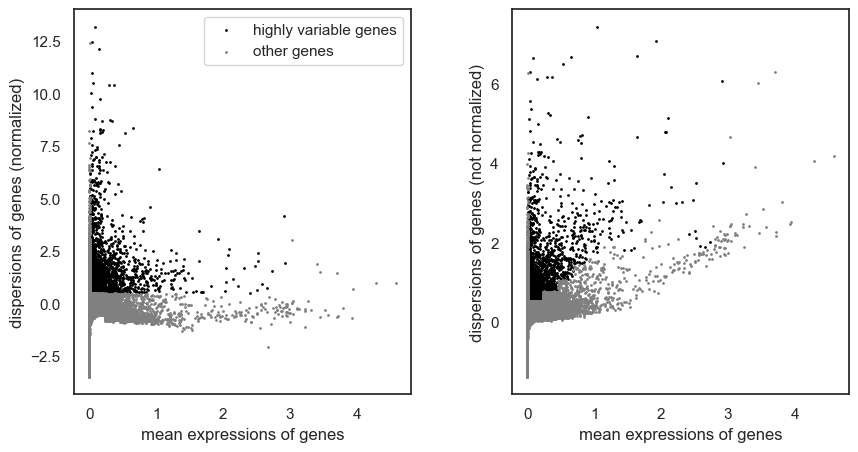

In [96]:
sc.pl.highly_variable_genes(adata)

In [35]:
adata

AnnData object with n_obs × n_vars = 110761 × 22348
    obs: 'SAMP_ID', 'Row.names', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ambient_RNA', 'percent_mito', 'percent_ribo', 'S.Score', 'G2M.Score', 'Phase', 'DF_doublet_score', 'DF_call_10pct', 'DF_call_1pct', 'DF_prediction', 'PROJ_bioinf_id', 'PROJ_glpg_id', 'PROJ_area', 'PROJ_species', 'PROJ_tissue', 'PROJ_tissue_detail', 'PROJ_biological_system', 'SAMP_subject_ID', 'SAMP_condition', 'SAMP_treatment', 'SAMP_stage', 'SAMP_exp_group', 'SAMP_sex', 'macrogen_sample_no', 'tube_ID', 'cell_count', 'library_Conc', 'library_size', 'SC_prep', 'treatment', 'perc_BW_change', 'pseudo_AS_score', 'MitochondrialRatio', 'RibosomalRatio', 'nCount_SCT', 'nFeature_SCT', 'clust_res0.3', 'clust_res0.6', 'CELL_celltype_compartment', 'ident', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_count

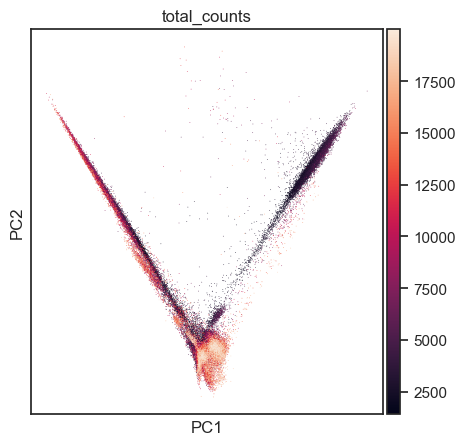

In [97]:
sc.pl.pca(adata, color='total_counts')

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


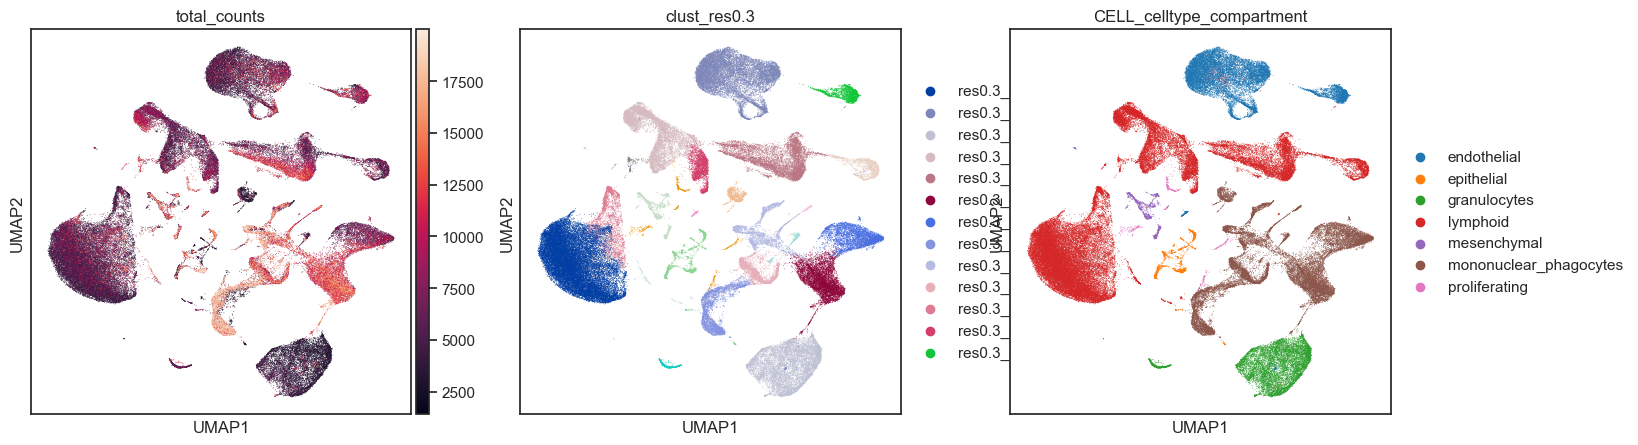

In [98]:
sc.pl.umap(adata, color=["total_counts", "clust_res0.3", "CELL_celltype_compartment"])

In [51]:
first_row_dict = adata.obs.head(1).to_dict(orient='records')[0]

print(first_row_dict)

{'SAMP_ID': '1_Sal_veh_d21', 'Row.names': 'AAACCCAAGACATATG-1', 'orig.ident': '1_Sal_veh_d21', 'nCount_RNA': 9001.0, 'nFeature_RNA': 2124, 'ambient_RNA': 0.66161004539263, 'percent_mito': 3.6218197978002444, 'percent_ribo': 51.53871792023108, 'S.Score': 0.07533456575453261, 'G2M.Score': 0.0008426034347188416, 'Phase': 'S', 'DF_doublet_score': 0.14389989572471323, 'DF_call_10pct': 'Singlet', 'DF_call_1pct': 'Singlet', 'DF_prediction': 'Singlet', 'PROJ_bioinf_id': '20211214_FIB_aged_BLM_model_singlecell', 'PROJ_glpg_id': '20211214_FIB_aged_BLM_model_singlecell', 'PROJ_area': 'Fibrosis', 'PROJ_species': 'Mouse', 'PROJ_tissue': 'Lung', 'PROJ_tissue_detail': 'Lung_right_lobe', 'PROJ_biological_system': 'bleomycin_model', 'SAMP_subject_ID': 1.0, 'SAMP_condition': 'SHAM', 'SAMP_treatment': 'none', 'SAMP_stage': 'day21', 'SAMP_exp_group': 'SHAM_day21', 'SAMP_sex': 'male', 'macrogen_sample_no': 1.0, 'tube_ID': 'A1', 'cell_count': 1700000.0, 'library_Conc': 7.28, 'library_size': 453.0, 'SC_prep'

In [60]:
adata.obs["SAMP_ID"].cat.categories # 

Index(['1_Sal_veh_d21', '2_Sal_veh_d21', '3_Sal_veh_d21', '4_Sal_veh_d21',
       '5_Sal_veh_d21', '6_Sal_veh_d21', '7_Sal_veh_d21', '8_Sal_veh_d21',
       '9_Sal_veh_d21', '11_Sal_veh_d21', '16_BLM_veh_d21', '17_BLM_veh_d21',
       '18_BLM_veh_d21', '20_BLM_veh_d21', '21_BLM_veh_d21', '25_BLM_veh_d21',
       '26_BLM_veh_d21', '27_BLM_veh_d21', '29_BLM_veh_d21', '33_BLM_veh_d21',
       '34_BLM_veh_d21', '35_BLM_veh_d21', '36_BLM_veh_d21', '40_BLM_veh_d21',
       '41_Sal_veh_d42', '42_Sal_veh_d42', '43_Sal_veh_d42', '44_Sal_veh_d42',
       '45_Sal_veh_d42', '46_Sal_veh_d42', '47_Sal_veh_d42', '48_Sal_veh_d42',
       '49_Sal_veh_d42', '50_Sal_veh_d42', '59_BLM_veh_d42', '60_BLM_veh_d42',
       '63_BLM_veh_d42', '66_BLM_veh_d42', '68_BLM_veh_d42', '73_BLM_veh_d42',
       '75_BLM_veh_d42', '76_BLM_veh_d42', '78_BLM_veh_d42'],
      dtype='object')

In [61]:
adata

AnnData object with n_obs × n_vars = 110761 × 22348
    obs: 'SAMP_ID', 'Row.names', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ambient_RNA', 'percent_mito', 'percent_ribo', 'S.Score', 'G2M.Score', 'Phase', 'DF_doublet_score', 'DF_call_10pct', 'DF_call_1pct', 'DF_prediction', 'PROJ_bioinf_id', 'PROJ_glpg_id', 'PROJ_area', 'PROJ_species', 'PROJ_tissue', 'PROJ_tissue_detail', 'PROJ_biological_system', 'SAMP_subject_ID', 'SAMP_condition', 'SAMP_treatment', 'SAMP_stage', 'SAMP_exp_group', 'SAMP_sex', 'macrogen_sample_no', 'tube_ID', 'cell_count', 'library_Conc', 'library_size', 'SC_prep', 'treatment', 'perc_BW_change', 'pseudo_AS_score', 'MitochondrialRatio', 'RibosomalRatio', 'nCount_SCT', 'nFeature_SCT', 'clust_res0.3', 'clust_res0.6', 'CELL_celltype_compartment', 'ident', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_count

In [63]:
adata.obs["SAMP_condition"].cat.categories

Index(['BLM', 'SHAM'], dtype='object')

In [58]:
adata.obs["clust_res0.3"].cat.categories

Index(['res0.3_c0', 'res0.3_c1', 'res0.3_c2', 'res0.3_c3', 'res0.3_c4',
       'res0.3_c5', 'res0.3_c6', 'res0.3_c7', 'res0.3_c8', 'res0.3_c9',
       'res0.3_c10', 'res0.3_c11', 'res0.3_c12', 'res0.3_c13', 'res0.3_c14',
       'res0.3_c15', 'res0.3_c16', 'res0.3_c17', 'res0.3_c18', 'res0.3_c19',
       'res0.3_c20', 'res0.3_c21', 'res0.3_c22', 'res0.3_c23', 'res0.3_c24',
       'res0.3_c25'],
      dtype='object')

In [99]:
adata.write("/home/p/pohll/Downloads/aged_bleomycin(1).h5ad")